## **Task 2**

## **Quora Question Pairing**

---



---




# **Importing Required Libraries** 

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{quora.csv}" with length {15681520 } bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving quora.csv to quora.csv
User uploaded file "quora.csv" with length 15681520 bytes


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style="darkgrid")

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.calibration import CalibratedClassifierCV

## **Loading the Data**

In [ ]:
df = pd.read_csv(r'/content/quora.csv')

In [ ]:
df.head()

,Unnamed: 0,index,id,qid1,qid2,question1,question2,is_duplicate
0,0,8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,1,368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
2,2,70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
3,3,226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
4,4,73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [ ]:
df.drop(['Unnamed: 0','index'],axis = 1,inplace=True)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
2,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
3,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
4,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            100000 non-null  int64 
 1   qid1          100000 non-null  int64 
 2   qid2          100000 non-null  int64 
 3   question1     100000 non-null  object
 4   question2     100000 non-null  object
 5   is_duplicate  100000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 4.6+ MB


In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
df['is_duplicate'].value_counts()

0    62879
1    37121
Name: is_duplicate, dtype: int64

In [ ]:
df.shape

(100000, 6)

## **Exploratory Data Analysis**

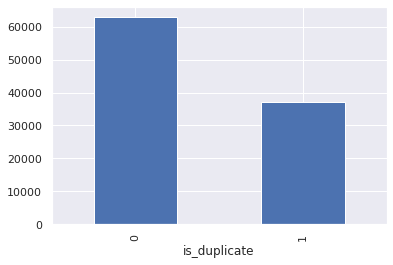

In [ ]:
df.groupby('is_duplicate')['id'].count().plot.bar();

**Observation:** 0 Represents Questions with different meaning and 1 Represents same meaning

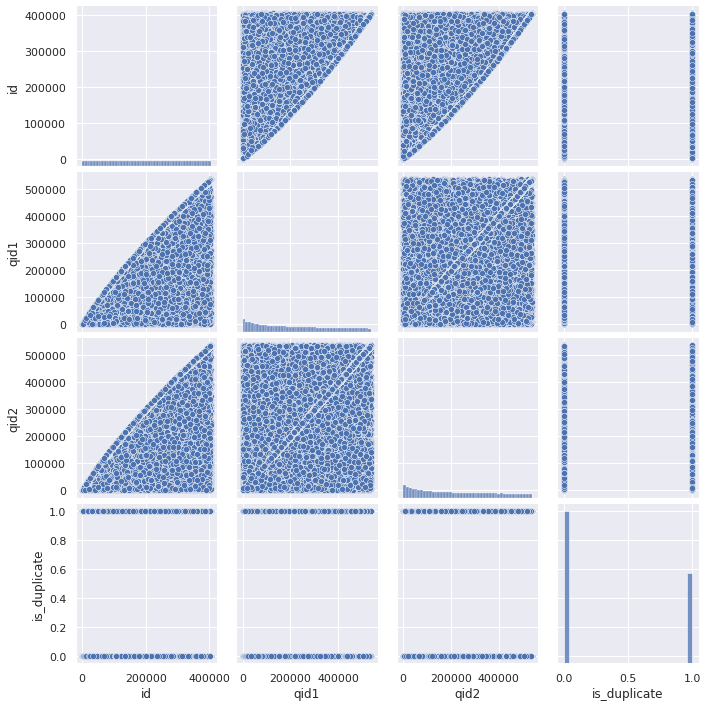

In [ ]:
sns.pairplot(df);

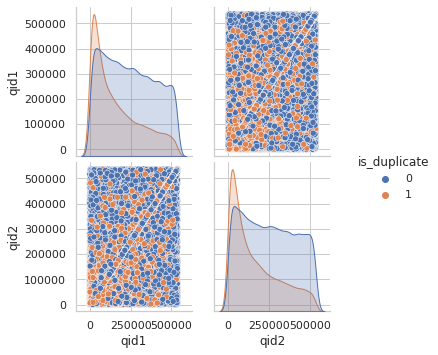

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df[['qid1', 'qid2', 'question1', 'question2','is_duplicate']], hue='is_duplicate');

**Checking if dataset is balanced or imbalanced**

In [ ]:
unique = len(set(list(df['qid1'])+list(df['qid2'])))
print('Total Number of Unique Questions  are: {}\n'.format(unique))

Total Number of Unique Questions  are: 166206



**Percentage of Similar question and Non-Similar Question**

In [ ]:
print('Question pairs are not Similar (is_duplicate = 0):\n  {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))

Question pairs are not Similar (is_duplicate = 0):
  62.88%


In [ ]:
print('Question pairs are not Similar (is_duplicate = 1):\n  {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

Question pairs are not Similar (is_duplicate = 1):
  37.12%


In [ ]:
qids = pd.Series(list(df['qid1']) + list(df['qid2'])) #Creating a dataframe that contains the question id of both quid1 and quid2
unique_qs = len(np.unique(qids))  #Numpy array to filter down all unique elements
qs_morethan_onetime = np.sum(qids.value_counts() > 1)   # Counts any question that have been repeated more than one time
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))

Total number of  Unique Questions are: 166206



In [ ]:
print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,round(qs_morethan_onetime/unique_qs*100,2)))

Number of unique questions that appear more than one time: 19070 (11.47%)



In [ ]:
print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) # Taking the frequency of all question and printing the max of them

Max number of times a single question is repeated: 37



In [ ]:
q_vals=qids.value_counts()#checking the value_counts
print(q_vals)


2559      37
4044      29
18753     23
30782     23
21712     19
          ..
302634     1
485054     1
491197     1
476858     1
262144     1
Length: 166206, dtype: int64


**Here we can see questions with qid [2559 ,18753, 4044] are some of the question that are repeated multiple times**

In [ ]:
# Looking at questions that are asked most frequently 

print(df.loc[df['qid1']==2559]['question1'].head(1).values)
print('='*50)
print(" "*50)
print(df.loc[df['qid1']==4044]['question1'].head(1).values)
print('='*50)
print(" "*50)
print(df.loc[df['qid1']==18753]['question1'].head(1).values)


['What are the best ways to lose weight?']
                                                  
['How can I lose weight quickly?']
                                                  
['How should I start my preparation for the IAS exam?']


In [ ]:
df.loc[df['qid1']==2559]

,id,qid1,qid2,question1,question2,is_duplicate
3282,390423,2559,5359,What are the best ways to lose weight?,What are the best things to do when working on...,1
5744,56239,2559,10321,What are the best ways to lose weight?,Where do I find a simple to understand solutio...,1
7093,381257,2559,3595,What are the best ways to lose weight?,How do i lose weight?,1
14141,228052,2559,7446,What are the best ways to lose weight?,What should you do if you want to lose a lot o...,1
42606,306135,2559,43544,What are the best ways to lose weight?,What are some good ways to lose weight?,1
54131,327551,2559,4507,What are the best ways to lose weight?,How can I efficiently lose weight?,1
73702,161485,2559,41484,What are the best ways to lose weight?,What is the best way to reduce body weight?,1
81139,402909,2559,190467,What are the best ways to lose weight?,How can you lose 5 pounds in 2 weeks safely?,0


In [ ]:
df.loc[df['qid1']==4044]

,id,qid1,qid2,question1,question2,is_duplicate
54716,11993,4044,20607,How can I lose weight quickly?,How can someone lose weight quickly?,1
87085,186746,4044,9900,How can I lose weight quickly?,What are the best ways to lose a lot of weight...,1
98879,159795,4044,146730,How can I lose weight quickly?,How can I lose my weight quickly ?,1


In [ ]:
df.loc[df['qid1']==18753]

,id,qid1,qid2,question1,question2,is_duplicate
14166,210595,18753,20127,How should I start my preparation for the IAS ...,How shoud I start my preparation for IAS?,1
15436,115439,18753,188234,How should I start my preparation for the IAS ...,I will be starting my engineering in a few day...,0
24203,173592,18753,7975,How should I start my preparation for the IAS ...,How should I start IAS preparation after gradu...,1
25988,283762,18753,89196,How should I start my preparation for the IAS ...,I am starting preparation for IAS UPSC Exam . ...,1
37586,70963,18753,76078,How should I start my preparation for the IAS ...,How do I start preparing for IAS prelims?,1
47883,382576,18753,37130,How should I start my preparation for the IAS ...,How do I start IAS preparation along with BE e...,1
51935,391378,18753,523972,How should I start my preparation for the IAS ...,Can I start preparing for IAS exam from scratc...,0
63969,86270,18753,7976,How should I start my preparation for the IAS ...,How should I start my preparation for IAS as a...,1
84111,203683,18753,34135,How should I start my preparation for the IAS ...,How do I start preparation for cracking the IA...,1
87375,185473,18753,25672,How should I start my preparation for the IAS ...,How do I start preparation of ias (in detail)?,1


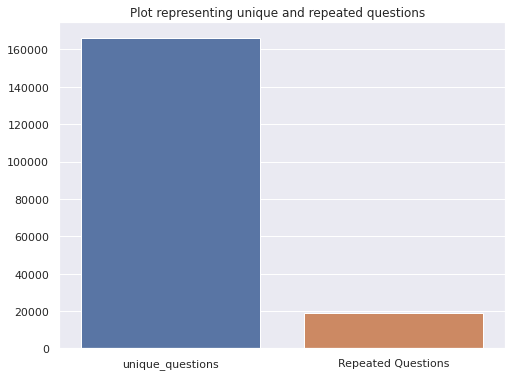

In [ ]:
sns.set_style("darkgrid")
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(8, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show();

In [ ]:
#checking whether there are any repeated pair of questions

#duplicateRowsDF = df[df.duplicated(['qid1','qid2'])]   # Collecting all Duplicate data into a dataframe so than we can also see what duplicate value we have

#print ("Number of duplicate questions : ",duplicateRowsDF.shape[0])

**Plotting Questions based on there frequency**

Maximum number of times a single question is repeated: 37



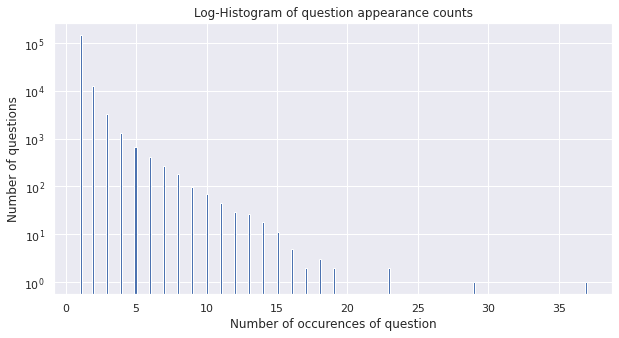

In [ ]:
plt.figure(figsize=(10, 5))

plt.hist(qids.value_counts(), bins=250)

plt.yscale('log')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts())))

In [ ]:
df[df.isnull().any(1)] #Checking is_null in our dataset

,id,qid1,qid2,question1,question2,is_duplicate


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df1 = df.loc[df['is_duplicate']==0, :]

df1.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
2,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
6,253209,367707,153452,How many hours a week do Google employees work?,How many hours a day do Google employees work ...,0
7,354651,483796,11244,How can we follow a Quora question privately w...,How can we view private Instagram pictures wit...,0


In [ ]:
df1['is_duplicate'].value_counts()

0    62879
Name: is_duplicate, dtype: int64

In [ ]:
words = ' '.join(df1['question1'])

print(words[:2000])

How do I play Pokémon GO in Korea? What are some of the best side dishes for crab cakes? Which is more advisable and better material for a crash test in automobiles, ductile or brittle? How many hours a week do Google employees work? How can we follow a Quora question privately without the knowledge of others users? How do I access reddit in Indonesia since the site has been banned by the Indonesian government? What are the travel API's in India? How do I tell my parents I'm not "grumpy", I'm depressed? Moto g4 screen is all black lights light up but can't see anything reset tricks do not work? My face skin is so dry, which cream or facewash should I use? If you invented and patented a home improvement product how would you go about trying to market it or making the world aware that it existed? Are Donald Trump's policies too draconian? Are there any family offices that invest in more speculative investments, i.e. non-revenue generating assets with long term appreciation potential? Wha

In [ ]:
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

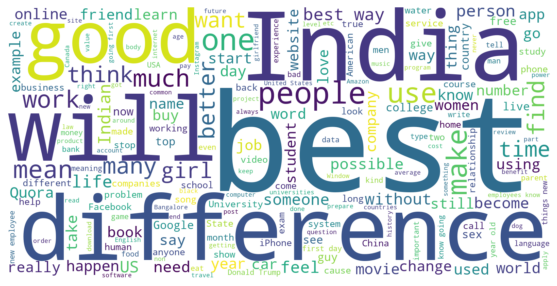

In [ ]:
plt.figure(1,figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**From the above word cloud image we can observ that the big sized words indicates more freaquently used words in question1**

## **Basic Feature Extraction**

In [ ]:
df['Q1_Length']=df['question1'].str.len()  # Finding length of Question 1
df['Q2_Length']=df['question2'].str.len()  # Finding length of Question 2


In [ ]:
df['Q1_num_of_words']=df['question1'].apply(lambda row : len(row.split()))   # Finding Number of Words in Question 1
df['Q2_num_of_words']=df['question2'].apply(lambda row : len(row.split()))   # Finding Number of Words in Question 21


### Function to find the number of common words in Question 1 and Question 2

In [ ]:
def common(row):
  return len((set(row['question1'].lower().split())).intersection(set(row['question2'].lower().split())))

df['Num_of_same_words'] = df.apply(common, axis = 1)

In [ ]:
df.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,Q1_Length,Q2_Length,Q1_num_of_words,Q2_num_of_words,Num_of_same_words
0,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7


## **Data Preprocession**



**Steps for Data Preprocessing:**

 - **Removing special characters**            
 - **Convert sentence into lower case**                 

 - **Remove Stop Words**                            
 - **Stemming or Lemmatization**

In [ ]:
!pip install nltk

In [ ]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [ ]:
## We can also use Lemmatizer instead of Stemmer

lemmatizer = WordNetLemmatizer()

In [ ]:
# initializing the lists

clean_question1_lst = []
question1_len_lst = []

clean_question2_lst = []
question2_len_lst = []

In [ ]:
def preprocess(raw_qs, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_qs)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_question1_lst.append(" ".join(words))
    
    question1_len_lst.append(len(words))

    clean_question2_lst.append(" ".join(words))
    
    question2_len_lst.append(len(words))


In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
clean_question1_lst = []
question1_len_lst = []

df['question1'].progress_apply(lambda x: preprocess(x,'stem'))

df['clean_question1_stem'] = clean_question1_lst
df['question1_length_stem'] = question1_len_lst

100%|██████████| 100000/100000 [02:05<00:00, 798.44it/s]


In [ ]:
clean_question2_lst= []
question2_len_lst = []
df['question2'].progress_apply(lambda x: preprocess(x,'stem'))

df['clean_question2_stem'] = clean_question2_lst
df['question2_length_stem'] = question2_len_lst

100%|██████████| 100000/100000 [02:05<00:00, 794.38it/s]


In [ ]:
clean_question1_lst = []
question1_len_lst = []
df['question1'].progress_apply(lambda x: preprocess(x,'lemma'))

df['clean_question1_lema'] = clean_question1_lst
df['question1_length_lema'] = question1_len_lst



100%|██████████| 100000/100000 [01:58<00:00, 845.14it/s]


In [ ]:
clean_question2_lst= []
question2_len_lst = []
df['question2'].progress_apply(lambda x: preprocess(x,'lemma'))

df['clean_question2_lema'] = clean_question2_lst
df['question2_length_lema'] = question2_len_lst

100%|██████████| 100000/100000 [01:56<00:00, 858.33it/s]


In [ ]:
df.tail(2)

,id,qid1,qid2,question1,question2,is_duplicate,Q1_Length,Q2_Length,Q1_num_of_words,Q2_num_of_words,Num_of_same_words,clean_question1_stem,question1_length_stem,clean_question2_stem,question2_length_stem,clean_question1_lema,question1_length_lema,clean_question2_lema,question2_length_lema
99998,35290,64515,64516,Which are some good english movies?,What are your favourite 10/10 Hollywood movies?,0,35,47,6,7,2,good english movi,3,favourit hollywood movi,3,good english movie,3,favourite hollywood movie,3
99999,225896,10268,334357,How does a skunk spray?,How do skunks spray?,1,23,20,5,4,2,skunk spray,2,skunk spray,2,skunk spray,2,skunk spray,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     100000 non-null  int64 
 1   qid1                   100000 non-null  int64 
 2   qid2                   100000 non-null  int64 
 3   question1              100000 non-null  object
 4   question2              100000 non-null  object
 5   is_duplicate           100000 non-null  int64 
 6   Q1_Length              100000 non-null  int64 
 7   Q2_Length              100000 non-null  int64 
 8   Q1_num_of_words        100000 non-null  int64 
 9   Q2_num_of_words        100000 non-null  int64 
 10  Num_of_same_words      100000 non-null  int64 
 11  clean_question1_stem   100000 non-null  object
 12  question1_length_stem  100000 non-null  int64 
 13  clean_question2_stem   100000 non-null  object
 14  question2_length_stem  100000 non-null  int64 
 15  c

### **Train Test Split**

In [ ]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

train, test = train_test_split(df,test_size=0.2,random_state=42)

**Bag Of Words**

In [ ]:
train_clean_question1 = []
for q1 in train['clean_question1_stem']:
    train_clean_question1.append(q1)

test_clean_question1 = []
for q1 in test['clean_question1_stem']:
    test_clean_question1.append(q1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2))

train_features = vectorizer.fit_transform(train_clean_question1)

test_features = vectorizer.transform(test_clean_question1)

In [ ]:
vectorizer.vocabulary_

{'properti': 155883,
 'asia': 10864,
 'expens': 66157,
 'asian': 10889,
 'mental': 123723,
 'govern': 83511,
 'strategi': 187871,
 'properti asia': 155887,
 'asia expens': 10874,
 'expens asian': 66160,
 'asian mental': 10923,
 'mental govern': 123734,
 'govern strategi': 83661,
 'best': 17970,
 'place': 148125,
 'visit': 210986,
 'wayanad': 214082,
 'kerala': 104547,
 'best place': 18866,
 'place visit': 148309,
 'visit wayanad': 211157,
 'wayanad kerala': 214083,
 'worth': 219442,
 'learn': 108870,
 'rubi': 168840,
 'worth learn': 219487,
 'learn rubi': 109263,
 'delet': 49146,
 'snapchat': 180672,
 'convers': 41425,
 'person': 145723,
 'abl': 204,
 'tell': 194628,
 'delet snapchat': 49226,
 'snapchat convers': 180681,
 'convers person': 41456,
 'person abl': 145724,
 'abl tell': 306,
 'think': 196798,
 'if': 93517,
 'better': 19384,
 'ia': 92847,
 'long': 114719,
 'term': 195129,
 'think if': 197038,
 'if better': 93518,
 'better ia': 19589,
 'ia long': 92868,
 'long term': 114894,


In [ ]:
train_clean_question2 = []
for q2 in train['clean_question2_stem']:
    train_clean_question2.append(q2)

test_clean_question2 = []
for q2 in test['clean_question2_stem']:
    test_clean_question2.append(q2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2))

train_features = vectorizer.fit_transform(train_clean_question2)

test_features = vectorizer.transform(test_clean_question2)

In [ ]:
vectorizer.vocabulary_

{'find': 69522,
 'term': 191564,
 'asian': 10762,
 'incred': 93997,
 'inaccur': 93484,
 'sinc': 175467,
 'indian': 94735,
 'isra': 99446,
 'iranian': 99032,
 'russian': 166618,
 'also': 5482,
 'asia': 10744,
 'peopl': 142221,
 'get': 76933,
 'call': 26358,
 'white': 212356,
 'black': 20718,
 'word': 214521,
 'yellow': 218135,
 'east': 56712,
 'consid': 39284,
 'racist': 156875,
 'differ': 50646,
 'find term': 69977,
 'term asian': 191576,
 'asian incred': 10790,
 'incred inaccur': 94000,
 'inaccur sinc': 93486,
 'sinc indian': 175514,
 'indian isra': 94906,
 'isra iranian': 99454,
 'iranian russian': 99048,
 'russian also': 166620,
 'also asia': 5492,
 'asia peopl': 10756,
 'peopl get': 142503,
 'get call': 77105,
 'call white': 26618,
 'white black': 212361,
 'black word': 20833,
 'word yellow': 214848,
 'yellow peopl': 218148,
 'peopl east': 142442,
 'east asia': 56715,
 'asia consid': 10748,
 'consid racist': 39463,
 'racist differ': 156879,
 'differ term': 51715,
 'best': 17564,
 '

In [ ]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 218947
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (80000, 218947)


In [ ]:
train.shape

(80000, 19)

In [ ]:
test.shape

(20000, 19)

In [ ]:
df.shape

(100000, 19)

In [ ]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'Q1_Length', 'Q2_Length', 'Q1_num_of_words', 'Q2_num_of_words',
       'Num_of_same_words', 'clean_question1_stem', 'question1_length_stem',
       'clean_question2_stem', 'question2_length_stem', 'clean_question1_lema',
       'question1_length_lema', 'clean_question2_lema',
       'question2_length_lema'],
      dtype='object')

### **Model Building and Evaluation without Hyperparameter Tuning**

In [ ]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=2)
]

In [ ]:
for classifier in Classifiers:
    model = classifier.fit(train_features,train['is_duplicate'])
    pred = model.predict(test_features)
    accuracy = accuracy_score(pred,test['is_duplicate'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.74815
Accuracy of DecisionTreeClassifier is 0.71865
Accuracy of RandomForestClassifier is 0.71685


### **EDA on New Basic Features**

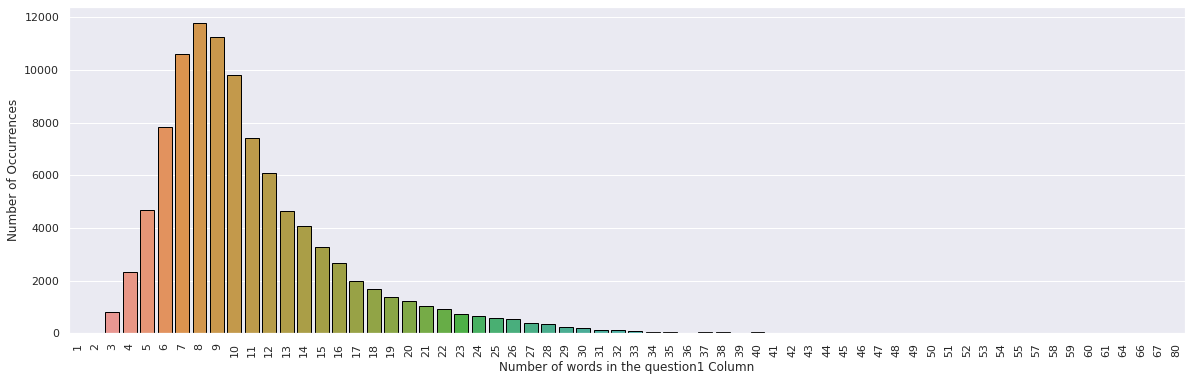

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(data = df,x = 'Q1_num_of_words',edgecolor = 'black')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of words in the question1 Column', fontsize=12)
plt.xticks(rotation='90')
plt.show()

**Observation:** 8 and 9 words are nearly 12000 occurrences in question1 column

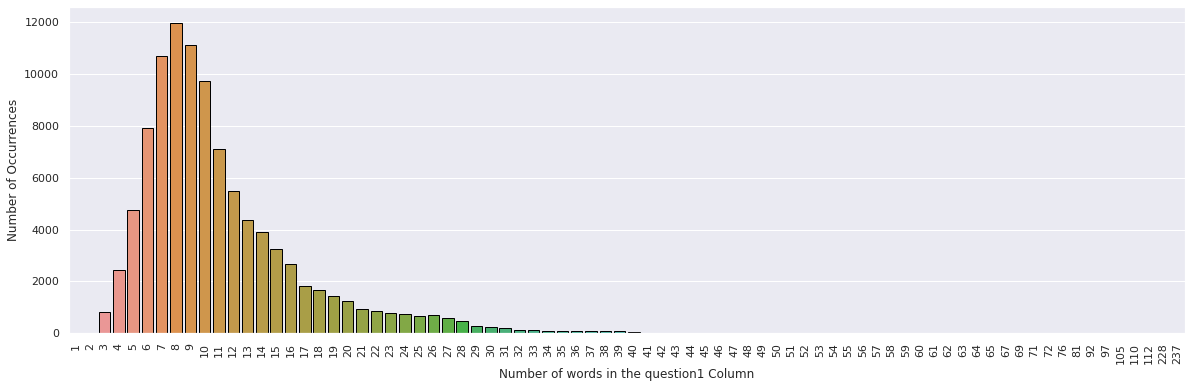

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(data = df, x = 'Q2_num_of_words',edgecolor = 'black' )
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of words in the question1 Column', fontsize=12)
plt.xticks(rotation='90')
plt.show()

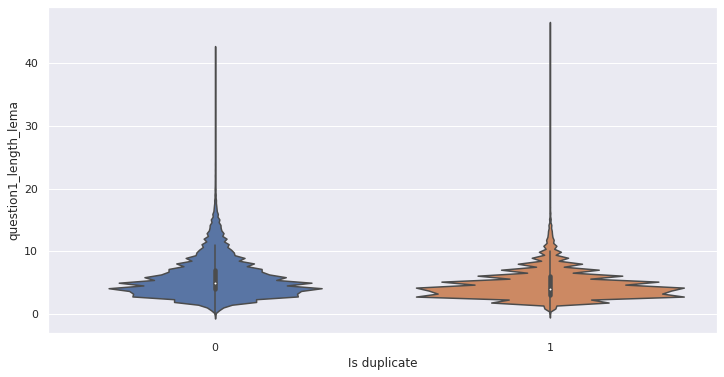

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x="is_duplicate", y="question1_length_lema", data=df)
plt.xlabel('Is duplicate', fontsize=12)
plt.ylabel('question1_length_lema', fontsize=12)
plt.show()


**Observation:** for  is_duplicate of 0 and 1 almost all the length of  question1_length_lema words lies in between 0 to 10

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'Num_of_same_words', data = df)

plt.subplot(1,2,2)
sns.histplot(x = 'is_duplicate', y = 'Num_of_same_words', data = df, label = "1", color = 'red')
sns.histplot(x = 'is_duplicate', y = 'Num_of_same_words', data = df, label = "0" , color = 'blue' )
plt.show()

In [ ]:
df.head(1)

In [ ]:
final_df = df.drop(['id', 'qid1', 'qid2', 'question1', 'question2','clean_question1_stem','clean_question2_stem','clean_question1_lema','clean_question2_lema'],axis = 1)

In [ ]:
final_df.head(1)

In [ ]:
target = final_df['is_duplicate']
data = final_df.drop("is_duplicate",axis=1)

In [ ]:
print(data.shape)
print(target.shape)

In [ ]:
target

In [ ]:
data

In [ ]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_data, \
                                                   target, \
                                                   test_size = 0.20, \
                                                   random_state = 0)


In [ ]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1

    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [ ]:
test_len = len(y_test)

Log loss on Test Data using Random Model 0.8919665345387344


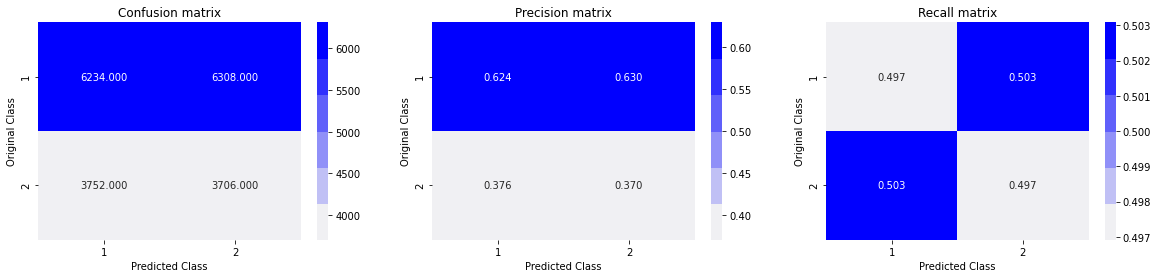

In [ ]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

### **Observation:** 
Log loss on Test Data using Random Model 0.8919665345387344 which is worst log loss model so reduce the log loss score we are performing Logestic Rregression with hyperparameter Tuning

For log loss 0 is good and 1 is worst

For values of alpha =  1e-05 The log loss is: 0.5783307772872873
For values of alpha =  0.0001 The log loss is: 0.5764884872599361
For values of alpha =  0.001 The log loss is: 0.5775428657032848
For values of alpha =  0.01 The log loss is: 0.5779364720248265
For values of alpha =  0.1 The log loss is: 0.5799400512509797
For values of alpha =  1 The log loss is: 0.6001271923287953
For values of alpha =  10 The log loss is: 0.6164067811692356


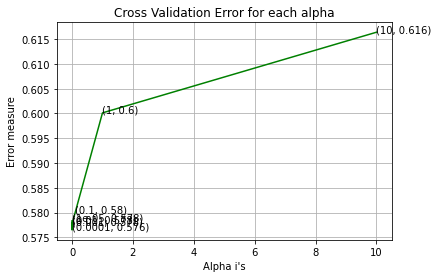

For values of best alpha =  0.0001 The train log loss is: 0.5731047643170407
For values of best alpha =  0.0001 The test log loss is: 0.5764884872599361
Total number of data points : 20000


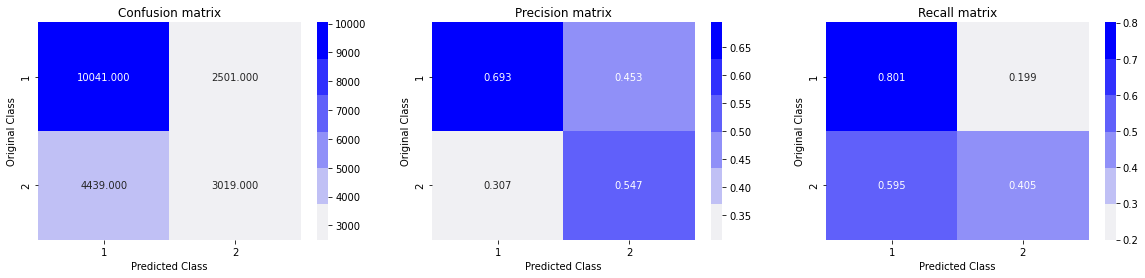

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparameter for SGD classifier

log_error_array = []
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=2)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-10))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-10))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
  ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=2)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-10))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-10))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

**Observation:**

For values of best alpha =  0.0001 The train log loss is: 0.5731
For values of best alpha =  0.0001 The test log loss is: 0.5764

These are the results after performing Logestic regression with Hyperparameter Tuning

In [ ]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.6555500000000001
